In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/AgriYield_18Crops_Final_Clean (2).csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (45600, 10)


,N,P,K,temperature,humidity,ph,rainfall,label,Element,Value
0,29,138,197,22.190554,92.437642,5.830892,121.662276,apple,Production,1050000.0
1,10,140,197,22.169395,90.271856,6.229499,124.468311,apple,Production,2276000.0
2,10,140,197,22.169395,90.271856,6.229499,124.468311,apple,Production,2814000.0
3,10,140,197,22.169395,90.271856,6.229499,124.468311,apple,Production,2316000.0
4,10,140,197,22.169395,90.271856,6.229499,124.468311,apple,Production,2327000.0


In [10]:
 df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45600 entries, 0 to 45599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            45600 non-null  int64  
 1   P            45600 non-null  int64  
 2   K            45600 non-null  int64  
 3   temperature  45600 non-null  float64
 4   humidity     45600 non-null  float64
 5   ph           45600 non-null  float64
 6   rainfall     45600 non-null  float64
 7   label        45600 non-null  object 
 8   Element      45600 non-null  object 
 9   Value        45600 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.5+ MB


In [11]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall,Value
count,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,45600.000000,4.560000e+04
mean,54.293158,55.790000,51.567368,25.007399,68.436851,6.366301,110.900290,1.472300e+07
std,37.904267,34.326484,53.543479,5.271098,25.364662,0.687455,55.602926,3.477465e+07
min,0.000000,5.000000,5.000000,8.825675,14.258040,4.507524,20.211267,2.550000e+05
25%,22.000000,29.000000,21.000000,21.900126,53.486820,5.868278,70.622474,1.473600e+06
50%,39.000000,55.000000,34.000000,24.967417,79.995776,6.303110,100.775617,3.266000e+06
75%,89.000000,71.000000,51.000000,27.777506,90.224262,6.777511,142.880890,1.202805e+07
max,140.000000,145.000000,205.000000,43.675493,99.981876,8.868741,298.560117,2.067270e+08


In [13]:
df.isnull().sum()


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0
Element,0
Value,0


In [14]:
unique_crops = df['label'].unique()
print("Total crops:", len(unique_crops))
print(unique_crops)


Total crops: 18
['apple' 'banana' 'chickpea' 'coconut' 'coffee' 'cotton' 'grapes' 'jute'
 'kidneybeans' 'lentil' 'maize' 'mango' 'muskmelon' 'orange' 'papaya'
 'pigeonpeas' 'rice' 'watermelon']


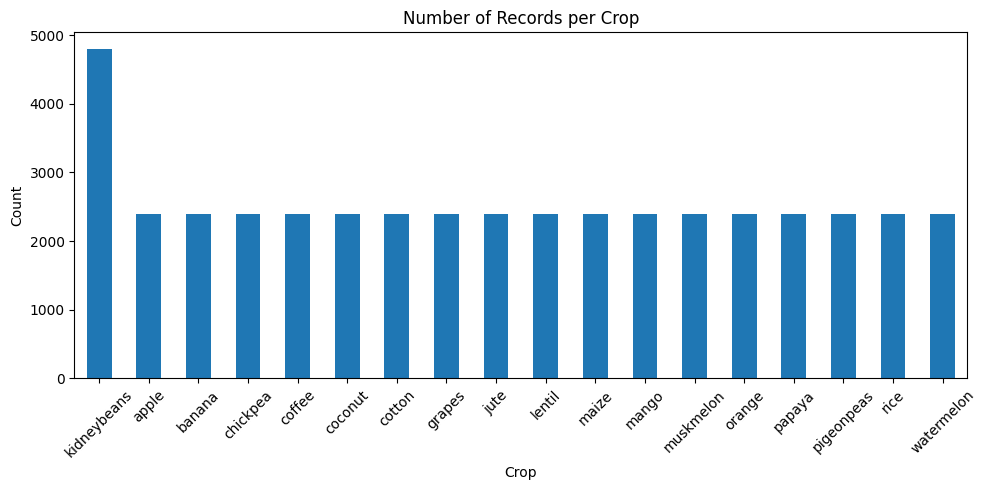

In [15]:
crop_counts = df['label'].value_counts()

plt.figure(figsize=(10,5))
crop_counts.plot(kind='bar')
plt.title("Number of Records per Crop")
plt.xlabel("Crop")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


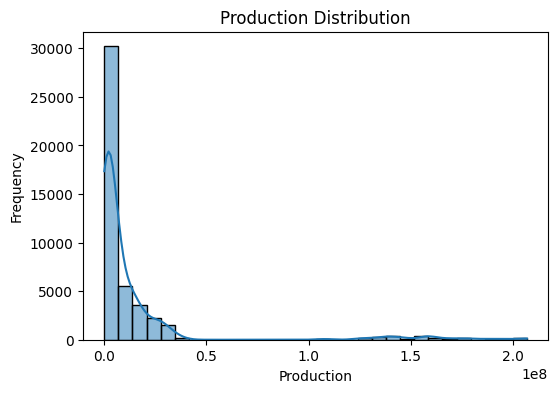

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['Value'], bins=30, kde=True)
plt.title("Production Distribution")
plt.xlabel("Production")
plt.ylabel("Frequency")
plt.show()


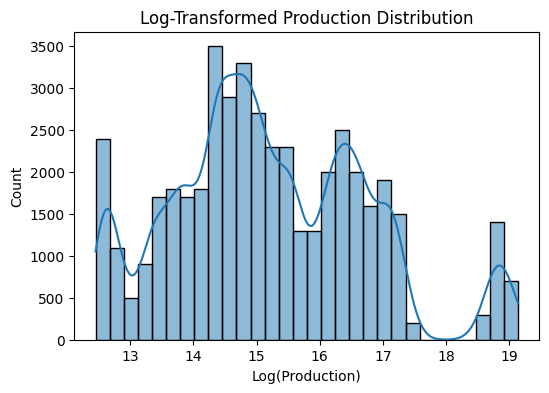

In [18]:
import numpy as np
df['log_production'] = np.log1p(df['Value'])

plt.figure(figsize=(6,4))
sns.histplot(df['log_production'], bins=30, kde=True)
plt.title("Log-Transformed Production Distribution")
plt.xlabel("Log(Production)")
plt.show()


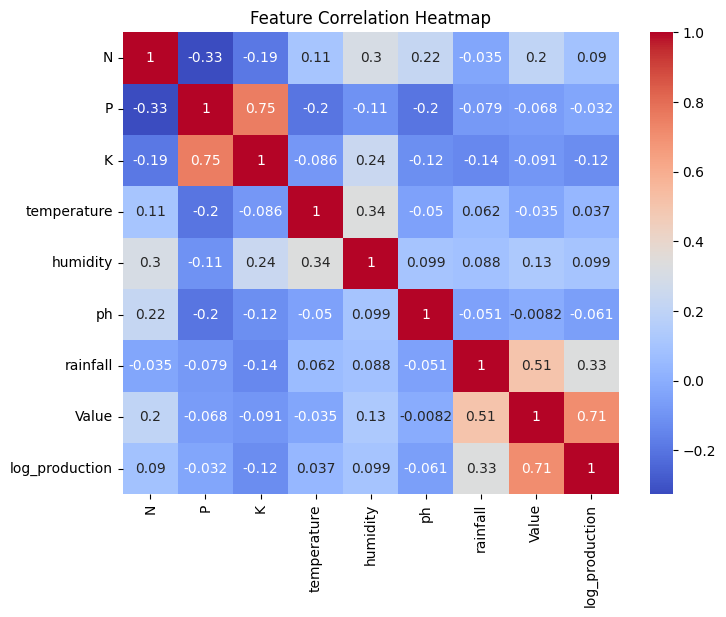

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


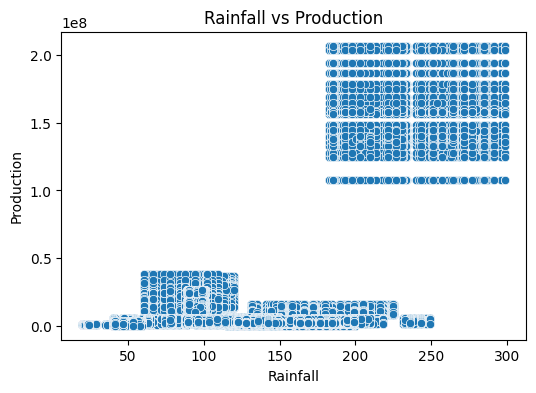

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='rainfall', y='Value', data=df)
plt.title("Rainfall vs Production")
plt.xlabel("Rainfall")
plt.ylabel("Production")
plt.show()


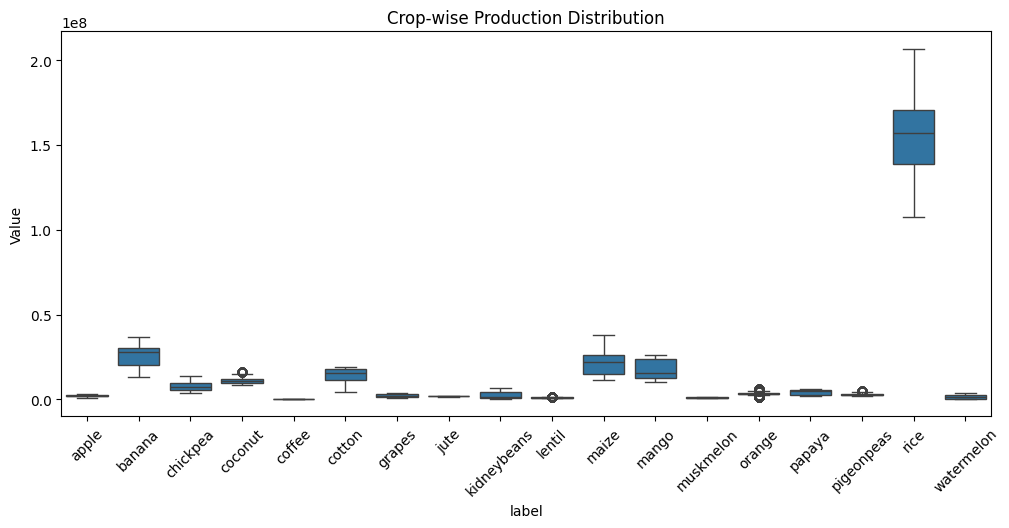

In [21]:
plt.figure(figsize=(12,5))
sns.boxplot(x='label', y='Value', data=df)
plt.xticks(rotation=45)
plt.title("Crop-wise Production Distribution")
plt.show()
